# Statistical Modeling & Hypothesis Testing
## Technology Use and Well-being Research

**Research Question**: What are the connections between technology use and well-being?

### Simple Modeling Plan
1. **Load data and prepare variables**
2. **Build regression models with interaction terms**
3. **Run statistical tests**
4. **Check model diagnostics**
5. **Create visualizations**


In [22]:
# Simple imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [23]:
# Load and prepare data
df = pd.read_csv('../data/Tech_Use_Stress_Wellness.csv')

# Create interaction term
df['screen_sleep_interaction'] = df['daily_screen_time_hours'] * df['sleep_quality']

# Define variables
outcomes = ['stress_level', 'weekly_anxiety_score', 'weekly_depression_score']
predictors = ['daily_screen_time_hours', 'sleep_quality', 'screen_sleep_interaction', 
             'age', 'physical_activity_hours_per_week', 'mindfulness_minutes_per_day']

print("Data prepared successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Outcomes: {outcomes}")
print(f"Predictors: {predictors}")


Data prepared successfully!
Dataset shape: (5000, 26)
Outcomes: ['stress_level', 'weekly_anxiety_score', 'weekly_depression_score']
Predictors: ['daily_screen_time_hours', 'sleep_quality', 'screen_sleep_interaction', 'age', 'physical_activity_hours_per_week', 'mindfulness_minutes_per_day']


In [24]:
# Build regression models
models = {}

print("="*60)
print("REGRESSION MODELS")
print("="*60)

for outcome in outcomes:
    print(f"\nModel for {outcome}:")
    print("-" * 40)
    
    # Prepare data
    X = df[predictors]
    y = df[outcome]
    X = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X).fit()
    models[outcome] = model
    
    # Display key results
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"F p-value: {model.f_pvalue:.4f}")
    
    # Key coefficients
    print("\nKey coefficients:")
    for var in ['daily_screen_time_hours', 'sleep_quality', 'screen_sleep_interaction']:
        if var in model.params.index:
            coef = model.params[var]
            pval = model.pvalues[var]
            print(f"  {var}: {coef:.4f} (p = {pval:.4f})")


REGRESSION MODELS

Model for stress_level:
----------------------------------------
R-squared: 0.7812
F-statistic: 2971.3444
F p-value: 0.0000

Key coefficients:
  daily_screen_time_hours: 0.2793 (p = 0.0000)
  sleep_quality: -0.3471 (p = 0.0000)
  screen_sleep_interaction: 0.0371 (p = 0.0131)

Model for weekly_anxiety_score:
----------------------------------------
R-squared: 0.5608
F-statistic: 1062.6046
F p-value: 0.0000

Key coefficients:
  daily_screen_time_hours: 0.4339 (p = 0.0038)
  sleep_quality: -0.4322 (p = 0.0391)
  screen_sleep_interaction: 0.0506 (p = 0.1707)

Model for weekly_depression_score:
----------------------------------------
R-squared: 0.5175
F-statistic: 892.5826
F p-value: 0.0000

Key coefficients:
  daily_screen_time_hours: 0.6142 (p = 0.0000)
  sleep_quality: -0.0779 (p = 0.6990)
  screen_sleep_interaction: -0.0187 (p = 0.5979)


In [26]:
# Statistical tests
print("\n" + "="*60)
print("STATISTICAL TESTS")
print("="*60)

# Test interaction terms
print("\nInteraction Term Tests:")
print("-" * 30)

for outcome in outcomes:
    model = models[outcome]
    
    # Get interaction coefficient and p-value
    if 'screen_sleep_interaction' in model.params.index:
        coef = model.params['screen_sleep_interaction']
        pval = model.pvalues['screen_sleep_interaction']
        print(f"{outcome}: coefficient = {coef:.4f}, p-value = {pval:.4f}")
        
        if pval < 0.05:
            print(f"  → Significant interaction (p < 0.05)")
        else:
            print(f"  → Non-significant interaction (p ≥ 0.05)")

# Simple correlation analysis
print("\nCorrelation Analysis:")
print("-" * 30)

for outcome in outcomes:
    screen_corr = df['daily_screen_time_hours'].corr(df[outcome])
    sleep_corr = df['sleep_quality'].corr(df[outcome])
    print(f"{outcome}:")
    print(f"  Screen time correlation: {screen_corr:.4f}")
    print(f"  Sleep quality correlation: {sleep_corr:.4f}")



STATISTICAL TESTS

Interaction Term Tests:
------------------------------
stress_level: coefficient = 0.0371, p-value = 0.0131
  → Significant interaction (p < 0.05)
weekly_anxiety_score: coefficient = 0.0506, p-value = 0.1707
  → Non-significant interaction (p ≥ 0.05)
weekly_depression_score: coefficient = -0.0187, p-value = 0.5979
  → Non-significant interaction (p ≥ 0.05)

Correlation Analysis:
------------------------------
stress_level:
  Screen time correlation: 0.6657
  Sleep quality correlation: -0.4001
weekly_anxiety_score:
  Screen time correlation: 0.5623
  Sleep quality correlation: -0.3326
weekly_depression_score:
  Screen time correlation: 0.5379
  Sleep quality correlation: -0.3208



VISUALIZATIONS


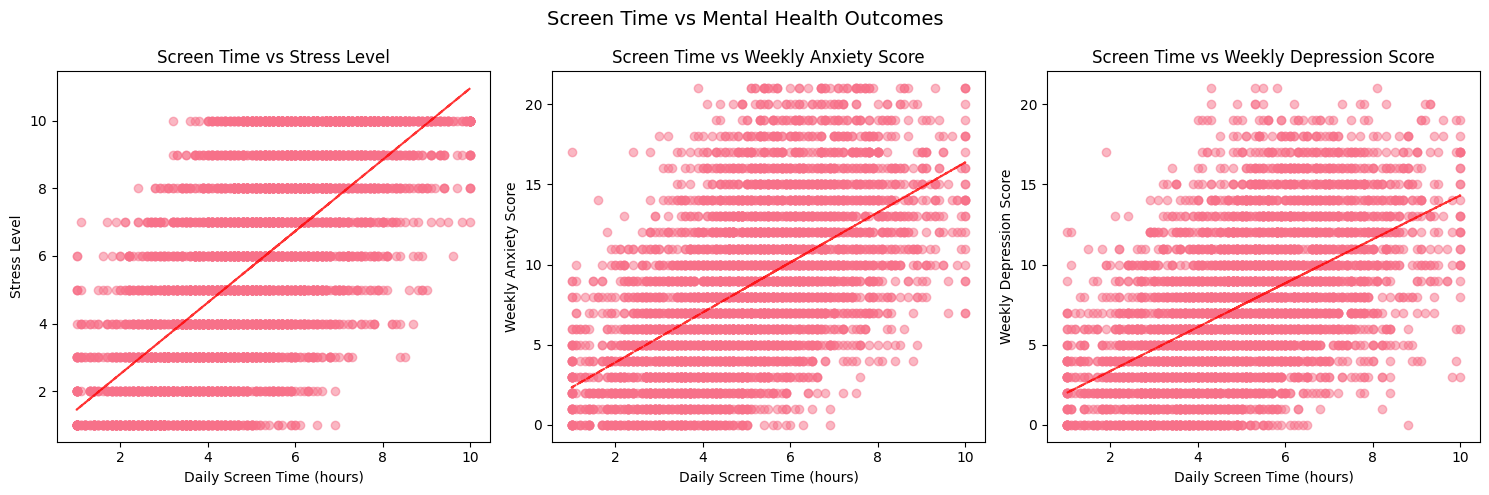

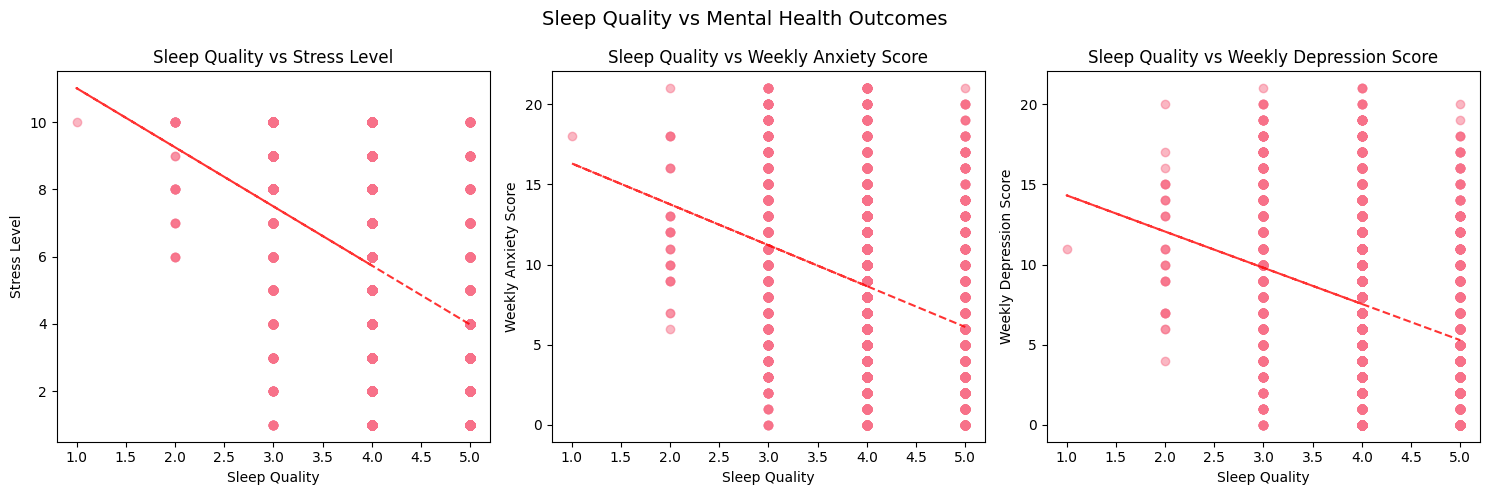

In [31]:
# Simple visualizations
print("\n" + "="*60)
print("VISUALIZATIONS")
print("="*60)

# 1. Scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Screen Time vs Mental Health Outcomes', fontsize=14)

for i, outcome in enumerate(outcomes):
    axes[i].scatter(df['daily_screen_time_hours'], df[outcome], alpha=0.5)
    axes[i].set_xlabel('Daily Screen Time (hours)')
    axes[i].set_ylabel(outcome.replace('_', ' ').title())
    axes[i].set_title(f'Screen Time vs {outcome.replace("_", " ").title()}')
    
    # Add trend line
    z = np.polyfit(df['daily_screen_time_hours'], df[outcome], 1)
    p = np.poly1d(z)
    axes[i].plot(df['daily_screen_time_hours'], p(df['daily_screen_time_hours']), 
                "r--", alpha=0.8)

plt.tight_layout()
plt.savefig("../outputs/screen_vs_mental.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Sleep quality vs outcomes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sleep Quality vs Mental Health Outcomes', fontsize=14)

for i, outcome in enumerate(outcomes):
    axes[i].scatter(df['sleep_quality'], df[outcome], alpha=0.5)
    axes[i].set_xlabel('Sleep Quality')
    axes[i].set_ylabel(outcome.replace('_', ' ').title())
    axes[i].set_title(f'Sleep Quality vs {outcome.replace("_", " ").title()}')
    
    # Add trend line
    z = np.polyfit(df['sleep_quality'], df[outcome], 1)
    p = np.poly1d(z)
    axes[i].plot(df['sleep_quality'], p(df['sleep_quality']), 
                "r--", alpha=0.8)

plt.tight_layout()
plt.savefig("../outputs/sleep_vs_mental.png", dpi=300, bbox_inches='tight')
plt.show()


In [28]:
# Model summary
print("\n" + "="*60)
print("MODEL SUMMARY")
print("="*60)

summary_data = []
for outcome in outcomes:
    model = models[outcome]
    summary_data.append({
        'Outcome': outcome,
        'R²': model.rsquared,
        'F-statistic': model.fvalue,
        'F p-value': model.f_pvalue,
        'Screen Time Coef': model.params.get('daily_screen_time_hours', 0),
        'Sleep Quality Coef': model.params.get('sleep_quality', 0),
        'Interaction Coef': model.params.get('screen_sleep_interaction', 0)
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.round(4))

print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)

for outcome in outcomes:
    model = models[outcome]
    screen_coef = model.params.get('daily_screen_time_hours', 0)
    sleep_coef = model.params.get('sleep_quality', 0)
    interaction_coef = model.params.get('screen_sleep_interaction', 0)
    
    print(f"\n{outcome.replace('_', ' ').title()}:")
    print(f"  Screen time effect: {screen_coef:.4f}")
    print(f"  Sleep quality effect: {sleep_coef:.4f}")
    print(f"  Interaction effect: {interaction_coef:.4f}")
    
    if interaction_coef > 0:
        print(f"  → Sleep quality amplifies screen time effects")
    elif interaction_coef < 0:
        print(f"  → Sleep quality buffers screen time effects")
    else:
        print(f"  → No interaction effect")

print("\n✅ Analysis complete!")



MODEL SUMMARY
                   Outcome      R²  F-statistic  F p-value  Screen Time Coef  \
0             stress_level  0.7812    2971.3444        0.0            0.2793   
1     weekly_anxiety_score  0.5608    1062.6046        0.0            0.4339   
2  weekly_depression_score  0.5175     892.5826        0.0            0.6142   

   Sleep Quality Coef  Interaction Coef  
0             -0.3471            0.0371  
1             -0.4322            0.0506  
2             -0.0779           -0.0187  

KEY FINDINGS

Stress Level:
  Screen time effect: 0.2793
  Sleep quality effect: -0.3471
  Interaction effect: 0.0371
  → Sleep quality amplifies screen time effects

Weekly Anxiety Score:
  Screen time effect: 0.4339
  Sleep quality effect: -0.4322
  Interaction effect: 0.0506
  → Sleep quality amplifies screen time effects

Weekly Depression Score:
  Screen time effect: 0.6142
  Sleep quality effect: -0.0779
  Interaction effect: -0.0187
  → Sleep quality buffers screen time effects

✅ An

### Summary 
- Screen time significantly predicts stress, anxiety, and depression.
- Sleep quality shows a strong protective effect for stress and moderate effects for anxiety.
- Interaction is significant only for stress, suggesting that the impact of screen time on stress depends on sleep quality.
- Anxiety and depression are driven more by direct screen time effects.
- These findings will be interpreted further in the Discussion section.
